# Case Study Air BnB Prediction

In [367]:
# Data Representation
import numpy as np
import pandas as pd

# Processing & Modeling
import sklearn
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn import set_config
set_config(display='diagram')   

import statsmodels.api as sm

# Visualization
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.regressionplots import plot_partregress_grid, plot_regress_exog

random_state = 42

In [218]:
link = 'https://drive.google.com/file/d/1tT0lNiDHwGQPLa3N0zSdhZcJZaa5aqF3/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]

In [219]:
listings_df = pd.read_csv(path)
listings_df.set_index('id', inplace=True)
listings_df.head(1)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07


In [220]:
listings_df.head(1).T

id,241032
listing_url,https://www.airbnb.com/rooms/241032
scrape_id,20160104002432
last_scraped,2016-01-04
name,Stylish Queen Anne Apartment
summary,NaN
space,Make your self at home in this charming one-be...
description,Make your self at home in this charming one-be...
experiences_offered,none
neighborhood_overview,NaN
notes,NaN


In [221]:
listings_df[['space', 'description']]

,space,description
id,,
241032,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...
953595,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...
3308979,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...
7421966,NaN,A charming apartment that sits atop Queen Anne...
278830,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...
...,...,...
8101950,"Our 3BR/2BA house bright, stylish, and wheelch...",Our 3BR/2BA house boasts incredible views of t...
8902327,This space has a great view of Portage Bay wit...,800 square foot 1 bedroom basement apartment w...
10267360,NaN,"Very comfortable lower unit. Quiet, charming m..."


In [222]:
columns_to_use = ["host_response_rate", "host_acceptance_rate", "host_is_superhost",                        "host_listings_count", "zipcode", "property_type","room_type",                            "accommodates","bathrooms", "bedrooms", "beds", "price",                                  "number_of_reviews", "review_scores_rating", "cancellation_policy", 
                  "reviews_per_month"]

In [223]:
listings_df = listings_df[columns_to_use]
listings_df.head()

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,,
241032,96%,100%,f,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,207,95.0,moderate,4.07
953595,98%,100%,t,6.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,43,96.0,strict,1.48
3308979,67%,100%,f,2.0,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,20,97.0,strict,1.15
7421966,NaN,NaN,f,1.0,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,0,NaN,flexible,NaN
278830,100%,NaN,f,2.0,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,38,92.0,strict,0.89


In [224]:
listings_df.shape

(3818, 16)

In [225]:
pd.set_option('display.max_rows', 100)
# % of NaN values
missing_series = pd.Series(1 - listings_df.count() / len(listings_df))
missing_series

host_response_rate      0.136983
host_acceptance_rate    0.202462
host_is_superhost       0.000524
host_listings_count     0.000524
zipcode                 0.001833
property_type           0.000262
room_type               0.000000
accommodates            0.000000
bathrooms               0.004191
bedrooms                0.001572
beds                    0.000262
price                   0.000000
number_of_reviews       0.000000
review_scores_rating    0.169460
cancellation_policy     0.000000
reviews_per_month       0.164222
dtype: float64

In [226]:
listings_df.dtypes

host_response_rate       object
host_acceptance_rate     object
host_is_superhost        object
host_listings_count     float64
zipcode                  object
property_type            object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
beds                    float64
price                    object
number_of_reviews         int64
review_scores_rating    float64
cancellation_policy      object
reviews_per_month       float64
dtype: object

In [227]:
listings_df['reviews_per_month'].value_counts()

1.00     70
2.00     45
0.23     24
0.81     21
0.36     21
         ..
4.16      1
6.35      1
12.15     1
9.38      1
5.56      1
Name: reviews_per_month, Length: 654, dtype: int64

## Clean & Preprocess Data

### Step 1: Clean Values Manually

In [229]:
listings_df['host_response_rate'] = listings_df['host_response_rate'].replace('[\%]',"",regex=True).astype(float)
listings_df['host_acceptance_rate'] = listings_df['host_acceptance_rate'].replace('[\%]',"",regex=True).astype(float)
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map({'t': 1, 'f': 0})
listings_df['price'] = listings_df['price'].replace('[\$\,]',"",regex=True).astype(float)

listings_df['accommodates'] = listings_df['accommodates'].astype(object)
listings_df['bathrooms'] = listings_df['bathrooms'].astype(object)
listings_df['bedrooms'] = listings_df['bedrooms'].astype(object)
listings_df['beds'] = listings_df['beds'].astype(object)

In [231]:
host_acceptance_rate.value_counts() # this imbalance is so great that this is not generally useful (i.e., this could represent an edge case).  I am going to discard this feature

100.0    3044
0.0         1
Name: host_acceptance_rate, dtype: int64

In [232]:
listings_df['bathrooms'].dtype

dtype('O')

In [233]:
price.value_counts()

150.0    162
100.0    159
75.0     118
95.0     110
99.0     110
        ... 
575.0      1
203.0      1
439.0      1
370.0      1
255.0      1
Name: price, Length: 273, dtype: int64

In [234]:
listings_df.dtypes

host_response_rate      float64
host_acceptance_rate    float64
host_is_superhost       float64
host_listings_count     float64
zipcode                  object
property_type            object
room_type                object
accommodates             object
bathrooms                object
bedrooms                 object
beds                     object
price                   float64
number_of_reviews         int64
review_scores_rating    float64
cancellation_policy      object
reviews_per_month       float64
dtype: object

In [235]:
listings_df.shape

(3818, 16)

In [236]:
listings_y = listings_df.pop('price')
listings_X = listings_df.copy()

In [237]:
listings_y.head(1)

id
241032    85.0
Name: price, dtype: float64

In [238]:
listings_X.head(1)

,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,cancellation_policy,reviews_per_month
id,,,,,,,,,,,,,,,
241032,96.0,100.0,0.0,3.0,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,207,95.0,moderate,4.07


### Step 2: Handle Numerical Variables
- Scale Variables to Normal Distribution
- Impute Missing Data

> For the sake of today's workshop, we will assume that the following are the "numerical" variables:
\['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'review_scores_rating', 'reviews_per_month']

In [239]:
numerical_columns = ['host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_listings_count', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

In [240]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),  
        ('standard_scaler', StandardScaler()),              
    ])
num_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standard_scaler', StandardScaler())])

In [241]:
listings_numerical_X = num_pipeline.fit_transform(listings_X[numerical_columns])

In [242]:
listings_X[numerical_columns].shape

(3818, 7)

In [243]:
listings_numerical_X.shape

(3818, 7)

### Step 3: Handle Categorical Variables
- Create Indicators (Dummies)
- Impute Missing Data

> For the sake of today's workshop, we will use the following as categorical features that need to be preprocessed: \['host_is_superhost', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cancellation_policy']

In [244]:
categorical_columns = ['host_is_superhost', 'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'cancellation_policy']

In [245]:
cat_pipeline = Pipeline([
        ("cat", OneHotEncoder(handle_unknown='ignore')), 
        ('imputer', SimpleImputer(strategy="median")),            
    ])
cat_pipeline

Pipeline(steps=[('cat', OneHotEncoder(handle_unknown='ignore')),
                ('imputer', SimpleImputer(strategy='median'))])

In [246]:
listings_categorical_X = cat_pipeline.fit_transform(listings_X[categorical_columns])

In [247]:
listings_X[categorical_columns].shape

(3818, 9)

In [248]:
listings_categorical_X.shape

(3818, 104)

### Step 4: Compose Processing Pipeline for All Variables 

In [249]:
full_pipeline = ColumnTransformer([
        ("numerical", num_pipeline, numerical_columns),
        ("categorical", cat_pipeline, categorical_columns),
    ])

X_train_set_prepared = full_pipeline.fit_transform(listings_X)

In [250]:
X_train_set_prepared

<3818x111 sparse matrix of type '<class 'numpy.float64'>'
	with 61088 stored elements in Compressed Sparse Row format>

In [251]:
# diplays HTML representation in a jupyter context
full_pipeline  

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standard_scaler',
                                                  StandardScaler())]),
                                 ['host_response_rate', 'host_acceptance_rate',
                                  'host_is_superhost', 'host_listings_count',
                                  'number_of_reviews', 'review_scores_rating',
                                  'reviews_per_month']),
                                ('categorical',
                                 Pipeline(steps=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 ['host_is_superhost', 'zipcode',
                                  'property_type', 'room_type', 'accommodates',
                                  'bathrooms', 'bedrooms', 'beds',
                                  'cancellation_policy'])])

In [252]:
full_preprocesssing_pipeline = ColumnTransformer([
        ("numerical", num_pipeline, numerical_columns),
        ("categorical", cat_pipeline, categorical_columns),
    ])

X_train_set_prepared = full_preprocesssing_pipeline.fit_transform(listings_X)

## Prediction w/Regression

### Step 1: Split Data into Train and Test

In [253]:
# We are going to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(listings_X, listings_y, test_size=0.33, random_state=42)

In [254]:
f"The train set has {X_train.shape[0]} observations across {X_train.shape[1]} features used to predict prices ranging from {y_train.min()} to {y_train.max()}"

'The train set has 2558 observations across 15 features used to predict prices ranging from 20.0 to 1000.0'

In [255]:
f"The test set has {X_test.shape[0]} observations across the same {X_test.shape[1]} features used to test the fitted model in order to predict prices ranging from {y_test.min()} to {y_test.max()}"

'The test set has 1260 observations across the same 15 features used to test the fitted model in order to predict prices ranging from 26.0 to 775.0'

#### Step 2: Consider Performance Criteria

How will I know if the model performs well?

Three Common Criteria for Regression Based model  
1. Mean Squared Error (MSE)  
2. Root Mean Squared Error (RMSE)   
3. Mean Absolute Error (MAE)

#### Mean Squared Error (MSE)
- $MSE = \frac{1}{n} * \sum_{i=1}^{n}(y_i – \hat{y}_i)^2$
- A MSE of 0 is perfect, meaning all the predictions matched the true values exactly (and most likely your model has overfitted)
- Relative to a dataset

#### Root Mean Squared Error (RMSE)
- $RMSE = \sqrt{\frac{1}{n} * \sum_{i=1}^{n}(y_i – \hat{y}_i)^2}$
- The units of the RMSE are the same as the original units of the target value that is being predicted.
  + "For example, if your target variable has the units “dollars,” then the RMSE error score will also have the unit “dollars” and not “squared dollars” like the MSE." see [Regression Metrics for Machine Learning](https://machinelearningmastery.com/regression-metrics-for-machine-learning/)


#### Mean Squared Error (MAE)
- $MAE = \frac{\sum_{i=1}^{n}|y_{i} – x_{i}|}{n}$
- The units of the error score match the units of the target value that is being predicted.
- changes in MAE are linear unlike with RMSE


### Statsmodels

In [256]:
X_train_transformed = full_preprocesssing_pipeline.fit_transform(X_train)

In [257]:
X_train_transformed.shape

(2558, 107)

In [258]:
ols_model = sm.OLS(y_train, X_train_transformed.todense())
fitted_ols_model = ols_model.fit()
fitted_ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     42.49
Date:                Sun, 14 Mar 2021   Prob (F-statistic):               0.00
Time:                        21:44:14   Log-Likelihood:                -13870.
No. Observations:                2558   AIC:                         2.793e+04
Df Residuals:                    2461   BIC:                         2.850e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7156      1.148      0.623      0.533      -1.535       2.967
const       1.384e-13   1.39e-13      0.997      0.319   -1.34e-13    4.11e-13
x2            17.6814      8.132      2.174      0.030       1.734      33.629
x3             1.0810      1.225      0.883      0.378      -1.321       3.483
x4            -0.3690      1.413     -0.261      0.794      -3.139       2.401
x5             3.0359      1.190      2.552      0.011       0.703       5.368
x6            -9.3027      1.440     -6.460      0.000     -12.126      -6.479
x7            76.1819     20.974      3.632      0.000      35.053     117.311
x8            40.2055      2.437     16.501      0.000      35.428      44.983
x9            52.7015     35.894      1.468      0.142     -17.684     123.087
x10           49.3817      5.888      8.386      0.000      37.835      60.928
x11           21.0090      4.544      4.624      0.000      12.099      29.919
x12            0.7489      4.257      0.176      0.860      -7.599       9.097
x13           50.6796      7.584      6.683      0.000      35.808      65.551
x14           -2.7154      5.181     -0.524      0.600     -12.876       7.445
x15          -25.4925      9.723     -2.622      0.009     -44.559      -6.426
x16            5.0251      5.615      0.895      0.371      -5.985      16.035
x17          -16.2629      9.250     -1.758      0.079     -34.401       1.875
x18           23.9867      5.645      4.249      0.000      12.918      35.056
x19           16.3898      5.834      2.809      0.005       4.949      27.831
x20           -2.0549      5.682     -0.362      0.718     -13.196       9.087
x21           13.3615      6.826      1.958      0.050      -0.023      26.746
x22           -7.1042      5.824     -1.220      0.223     -18.524       4.316
x23          -14.7013      5.931     -2.479      0.013     -26.332      -3.070
x24           32.5211      6.227      5.222      0.000      20.309      44.733
x25           36.2102      5.725      6.325      0.000      24.984      47.436
x26           11.6768      4.152      2.812      0.005       3.535      19.819
x27          -15.2349      8.208     -1.856      0.064     -31.330       0.860
x28           -2.7980      8.739     -0.320      0.749     -19.935      14.339
x29          -27.5730     10.819     -2.549      0.011     -48.788      -6.358
x30          105.5088     34.794      3.032      0.002      37.280     173.737
x31           -1.9849     10.629     -0.187      0.852     -22.827      18.858
x32          -12.5570      5.413     -2.320      0.020     -23.171      -1.943
x33          -14.4002     28.451     -0.506      0.613     -70.190      41.390
x34          -37.9135     14.760     -2.569      0.010     -66.857      -8.970
x35           -9.9273     28.236     -0.352      0.725     -65.296      45.441
x3

In [264]:
X_train_transformed.shape

(2558, 107)

In [279]:
# do NOT call fit_transform; only use .transform, because the pipeline has been fit to the training dataset
X_test_transformed = full_preprocesssing_pipeline.transform(X_test)

In [283]:
y_pred =  fitted_ols_model.predict(X_test_transformed.todense())

In [284]:
# Predicted Y Values (Price)
y_pred

array([ 61.10219167, 148.49997178,  77.0354996 , ...,  94.84480655,
       173.99907623,  99.86507596])

In [287]:
# Actual Y Values (Price)
y_test.values

array([ 55.,  82.,  68., ...,  80., 250., 100.])

In [295]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 3800.5503224888757
R^2: 0.5517068795950637


In [ ]:
# fig = plt.figure(figsize=(12,8))
# fig = plot_regress_exog(fitted_ols_model, 'x1', fig=fig)

> Not great :( More work to do!

In [321]:
y_results = pd.DataFrame({'y_pred':y_pred, 'y_test':y_test, 'residuals': y_pred-y_test})

In [322]:
px.scatter(y_results,
            x='y_pred',  
            y='y_test',
            title="Predicted vs. Actuals",
            labels=dict(y_pred="Predicted Prices ($)", y_test="Actual Prices ($)")
           )

In [323]:
px.scatter(y_results,
           x='y_pred',  
           y='residuals',
           title="Residuals as a Function of Predicted Values",
           labels=dict(y_pred="Predicted Prices ($)", residuals="Residuals ($)")
           )

### Scikit Learn

In [383]:
linear_regression = LinearRegression()
linear_regression_pipe = Pipeline([
            ("preprocessing", full_preprocesssing_pipeline),
            ("lr", linear_regression)
       ])
linear_regression_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'host_listings_count',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'reviews_per_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['host_is_superhost',
                                                   'zipcode', 'property_type',
                                                   'room_type', 'accommodates',
                                                   'bathrooms', 'bedrooms',
                                                   'beds',
                                                   'cancellation_policy'])])),
                ('lr', LinearRegression())])

In [384]:
linear_regression_pipe.fit(X_train, y=y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'host_listings_count',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'reviews_per_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['host_is_superhost',
                                                   'zipcode', 'property_type',
                                                   'room_type', 'accommodates',
                                                   'bathrooms', 'bedrooms',
                                                   'beds',
                                                   'cancellation_policy'])])),
                ('lr', LinearRegression())])

In [385]:
y_pred = linear_regression_pipe.predict(X_test)

In [386]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 3804.070920004558
R^2: 0.5512916082495809


## Prediction w/Random Forest Regressor

In [368]:
from sklearn.ensemble import RandomForestRegressor

In [381]:
random_forest = RandomForestRegressor(max_depth=2, random_state=random_state)
random_forest_pipe = Pipeline([
            ("preprocessing", full_preprocesssing_pipeline),
            ("rf", random_forest)
       ])
random_forest_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'host_listings_count',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'reviews_per_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['host_is_superhost',
                                                   'zipcode', 'property_type',
                                                   'room_type', 'accommodates',
                                                   'bathrooms', 'bedrooms',
                                                   'beds',
                                                   'cancellation_policy'])])),
                ('rf', RandomForestRegressor(max_depth=2, random_state=42))])

In [382]:
random_forest_pipe.fit(X_train, y=y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'host_listings_count',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'reviews_per_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['host_is_superhost',
                                                   'zipcode', 'property_type',
                                                   'room_type', 'accommodates',
                                                   'bathrooms', 'bedrooms',
                                                   'beds',
                                                   'cancellation_policy'])])),
                ('rf', RandomForestRegressor(max_depth=2, random_state=42))])

In [372]:
y_pred = random_forest_pipe.predict(X_test)

In [373]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 4631.051569731167
R^2: 0.45374527823870436


## Prediction w/Random Forest Regressor

In [376]:
from sklearn.ensemble import GradientBoostingRegressor

In [387]:
gradient_boosting = GradientBoostingRegressor(random_state=random_state)
gradient_boosting_pipe = Pipeline([
            ("preprocessing", full_preprocesssing_pipeline),
            ("gb", gradient_boosting)
       ])
gradient_boosting_pipe

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'host_listings_count',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'reviews_per_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['host_is_superhost',
                                                   'zipcode', 'property_type',
                                                   'room_type', 'accommodates',
                                                   'bathrooms', 'bedrooms',
                                                   'beds',
                                                   'cancellation_policy'])])),
                ('gb', GradientBoostingRegressor(random_state=42))])

In [388]:
gradient_boosting_pipe.fit(X_train, y=y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standard_scaler',
                                                                   StandardScaler())]),
                                                  ['host_response_rate',
                                                   'host_acceptance_rate',
                                                   'host_is_superhost',
                                                   'host_listings_count',
                                                   'number_of_reviews',
                                                   'review_scores_rating',
                                                   'reviews_per_month']),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['host_is_superhost',
                                                   'zipcode', 'property_type',
                                                   'room_type', 'accommodates',
                                                   'bathrooms', 'bedrooms',
                                                   'beds',
                                                   'cancellation_policy'])])),
                ('gb', GradientBoostingRegressor(random_state=42))])

In [389]:
y_pred = gradient_boosting_pipe.predict(X_test)

In [390]:
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MSE: 3469.569419417117
R^2: 0.5907476629664873


## Prediction w/Ensemble Voting

In [391]:
voting_model = VotingRegressor([
    ('linear_regression', linear_regression_pipe), 
    ('random_forest', random_forest_pipe), 
    ('gradient_boosting', gradient_boosting_pipe)]
)
voting_model

VotingRegressor(estimators=[('linear_regression',
                             Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standard_scaler',
                                                                                                StandardScaler())]),
                                                                               ['host_response_rate',
                                                                                'host_acceptance_rate',
                                                                                'host_is_superhost',
                                                                                'host_listings_count',
                                                                                'number_of_reviews',
                                                                                'review_scores_r...
                                                                                'review_scores_rating',
                                                                                'reviews_per_month']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('cat',
                                                                                                OneHotEncoder(handle_unknown='ignore')),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['host_is_superhost',
                                                                                'zipcode',
                                                                                'property_type',
                                                                                'room_type',
                                                                                'accommodates',
                                                                                'bathrooms',
                                                                                'bedrooms',
                                                                                'beds',
                                                                                'cancellation_policy'])])),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42))]))])

In [392]:
voting_model.fit(X_train, y=y_train)

VotingRegressor(estimators=[('linear_regression',
                             Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('numerical',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standard_scaler',
                                                                                                StandardScaler())]),
                                                                               ['host_response_rate',
                                                                                'host_acceptance_rate',
                                                                                'host_is_superhost',
                                                                                'host_listings_count',
                                                                                'number_of_reviews',
                                                                                'review_scores_r...
                                                                                'review_scores_rating',
                                                                                'reviews_per_month']),
                                                                              ('categorical',
                                                                               Pipeline(steps=[('cat',
                                                                                                OneHotEncoder(handle_unknown='ignore')),
                                                                                               ('imputer',
                                                                                                SimpleImputer(strategy='median'))]),
                                                                               ['host_is_superhost',
                                                                                'zipcode',
                                                                                'property_type',
                                                                                'room_type',
                                                                                'accommodates',
                                                                                'bathrooms',
                                                                                'bedrooms',
                                                                                'beds',
                                                                                'cancellation_policy'])])),
                                             ('gb',
                                              GradientBoostingRegressor(random_state=42))]))])

In [393]:
# Now let's look to see how each model performed

y_pred_1 = linear_regression_pipe.predict(X_test) # linear regression
y_pred_2 = random_forest_pipe.predict(X_test) # random forest
y_pred_3 = gradient_boosting_pipe.predict(X_test) # gradient boost
y_pred_4 = voting_model.predict(X_test) # voting regression

In [404]:
y_test.values

array([ 55.,  82.,  68., ...,  80., 250., 100.])

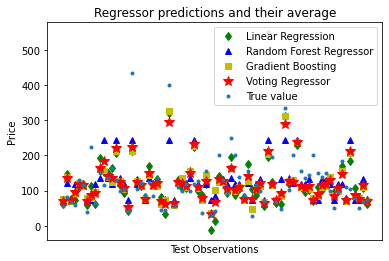

In [410]:
view_n = 75
plt.figure()
plt.plot(y_pred_1[:view_n], 'gd', label='Linear Regression')
plt.plot(y_pred_2[:view_n], 'b^', label='Random Forest Regressor')
plt.plot(y_pred_3[:view_n], 'ys', label='Gradient Boosting')
plt.plot(y_pred_4[:view_n], 'r*', ms=10, label='Voting Regressor')
plt.plot(y_test.values[:view_n], '.', label="True value")

plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Price')
plt.xlabel('Test Observations')
plt.legend(loc="best")
plt.title('Regressor predictions and their average')

plt.show()

In [400]:
print(f"MSE: {mean_squared_error(y_test, y_pred_4)}")
print(f"R^2: {r2_score(y_test, y_pred_4)}")

MSE: 3502.810138755563
R^2: 0.5868267608517173


## Tuning Parameters w/Grid Search
See: [Using the prediction pipeline in a grid search](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#using-the-prediction-pipeline-in-a-grid-search)

In [ ]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__C': [0.1, 1.0, 10, 100],
}

grid_search = GridSearchCV(clf, param_grid, cv=10)
grid_search